In [1]:
from keras.applications import VGG16
import os,sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras import optimizers
import time
import glob
import cv2

Using TensorFlow backend.
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflo

In [2]:
from keras import backend as K

if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [3]:
folder = os.listdir("./data/copy/")
image_size = 50
dense_size = len(folder)

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./data/copy/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
X = np.array(X)
Y = np.array(Y)
X = X.astype('float32')
X = X / 255.0


Y = np_utils.to_categorical(Y, dense_size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

batch_size = 64
nb_epoch = 100

In [4]:
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


[0. 1.]


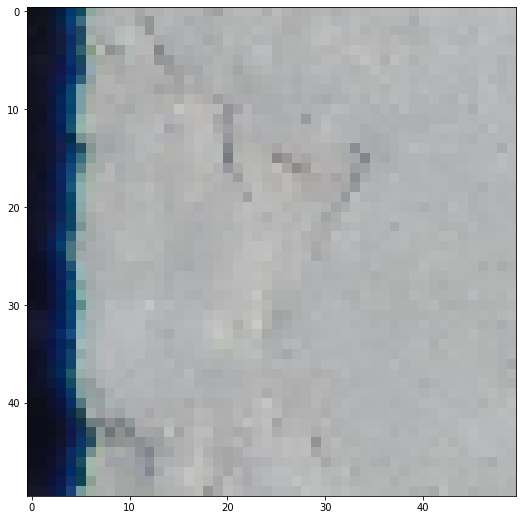

In [5]:
print(Y[7218])
fig = plt.figure(figsize=(16,9))
plt.imshow(X[7218])
plt.show()

In [6]:
model_file_name = 'model_copy.hdf5'
model = load_model('./model/' + model_file_name)

score = model.evaluate(X_test,y_test,verbose=1)
print("evaluate loss: {0[0]}".format(score))
print("evaluate acc: {0[1]}".format(score))

prex = model.predict(X_test)
wrong = []
w_index = []
for i in range(2604):
    yi = y_test[i:i+1]
    prei = prex[i:i+1]
    if prei.argmax() != yi.argmax():
        wrong.append(i)
        w_index.append(y_test[i])
wrong = np.array(wrong)   
wrong.astype('float32')
w_index = np.array(w_index)

print(wrong)
print(w_index)
print('wrong',len(wrong))

2604/2604 [==============================] - 2s 748us/step
evaluate loss: 0.21727472393789232
evaluate acc: 0.9228110599078341
[  47   70   80   94   96   97  136  139  140  145  146  152  163  185
  187  199  204  209  225  228  230  242  243  261  266  270  296  298
  302  312  316  318  320  327  328  331  347  351  355  357  375  383
  391  395  403  421  424  426  430  434  447  475  492  516  525  539
  547  555  576  586  605  625  653  659  665  675  682  696  697  712
  780  783  787  809  813  821  832  876  906  926  929  932  935  938
  939  944  955  981 1005 1031 1034 1040 1060 1068 1069 1072 1108 1120
 1140 1152 1194 1216 1223 1226 1231 1244 1263 1264 1271 1281 1319 1352
 1371 1404 1429 1444 1451 1455 1457 1487 1493 1499 1511 1516 1520 1527
 1534 1543 1547 1561 1576 1595 1597 1598 1627 1650 1664 1689 1690 1694
 1703 1742 1752 1800 1805 1807 1834 1839 1849 1859 1860 1863 1881 1896
 1904 1923 1931 1938 1939 1947 1996 2003 2009 2013 2031 2070 2094 2095
 2136 2144 2192 2206 

In [7]:
wrong_dir = './data/wrong_learning/'
if os.path.exists(wrong_dir)==False:os.mkdir(wrong_dir)
    
for i in range(len(wrong)):
    im = (X[wrong[i]]*255)
    img = Image.fromarray(np.uint8(im))
    img.save(wrong_dir + '{}.jpg'.format(i))

[1. 0.]


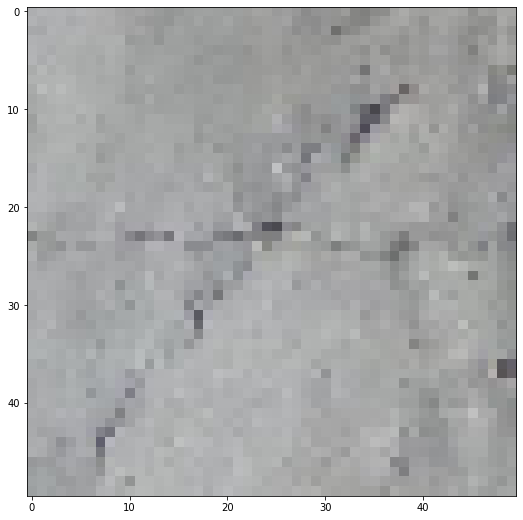

In [8]:
print(w_index[106])
fig = plt.figure(figsize=(16,9))
plt.imshow(X[wrong[106]])
plt.show()

In [9]:
image_size = 256
X[0] = X[0].resize((image_size, image_size))
fig = plt.figure(figsize=(16,9))
plt.imshow(X[0])
plt.show()

ValueError: cannot resize this array: it does not own its data